In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news/News.csv


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import pickle

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
nltk.download('punkt') 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer 

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [24]:
from wordcloud import WordCloud

In [25]:
data=pd.read_csv('/kaggle/input/fake-news/News.csv', index_col=0)
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [26]:
data.shape

(44919, 5)

In [27]:
data.isnull().sum()

title       0
text        0
subject    21
date       21
class       0
dtype: int64

In [28]:
data=data.drop(['title','subject','date'], axis=1)

In [29]:
data=data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(['index'], axis=1, inplace=True)

<Axes: xlabel='class', ylabel='count'>

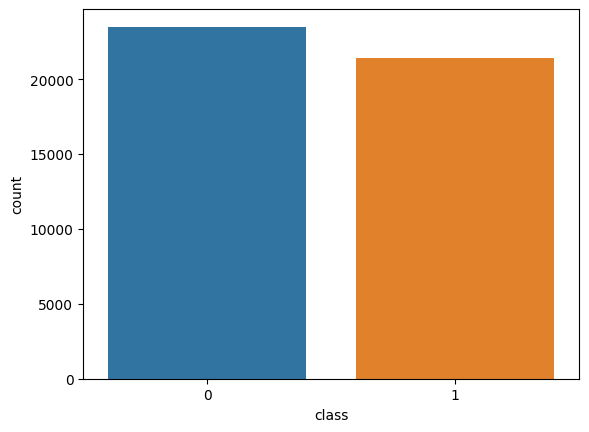

In [30]:
sns.countplot(data=data, 
              x='class', 
              order=data['class'].value_counts().index)

In [31]:
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = tex t.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

data['cleaned_text'] = data['text'].apply(preprocess_text)

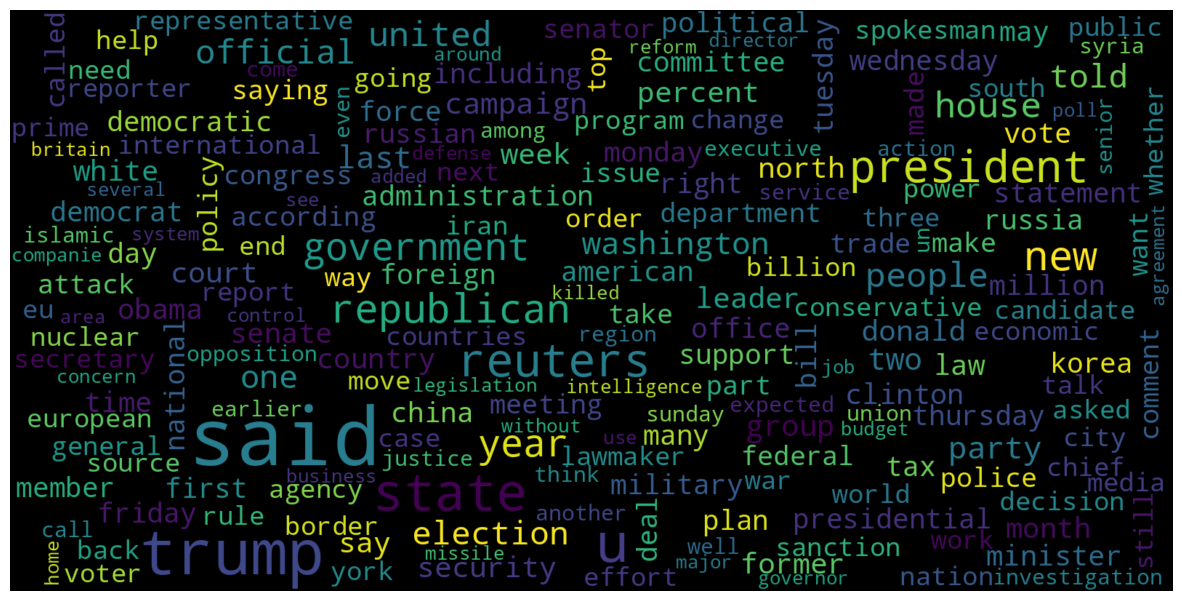

In [33]:
consolidated_real_news = ' '.join( 
    word for word in data['cleaned_text'][data['class'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, 
                      height=800, 
                      random_state=21, 
                      max_font_size=110, 
                      collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated_real_news), interpolation='bilinear') 
plt.axis('off') 
plt.show() 
#Real

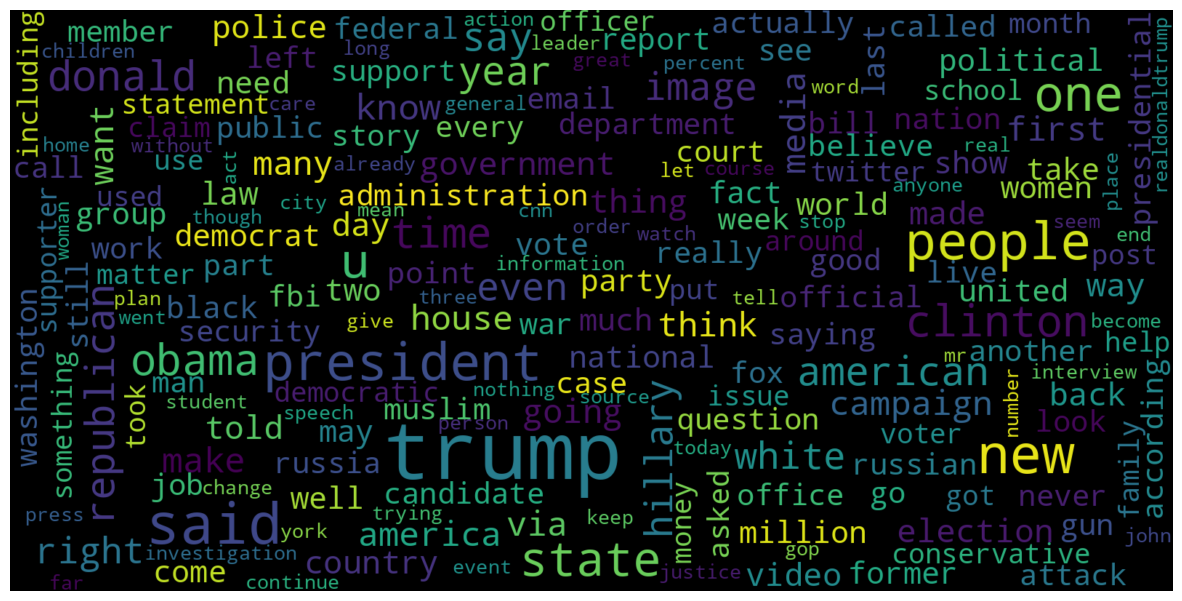

In [34]:
consolidated_fake_news = ' '.join( 
    word for word in data['cleaned_text'][data['class'] == 0].astype(str)) 
wordCloud = WordCloud(width=1600, 
                      height=800, 
                      random_state=21, 
                      max_font_size=110, 
                      collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated_fake_news), interpolation='bilinear') 
plt.axis('off') 
plt.show() 
#Fake

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

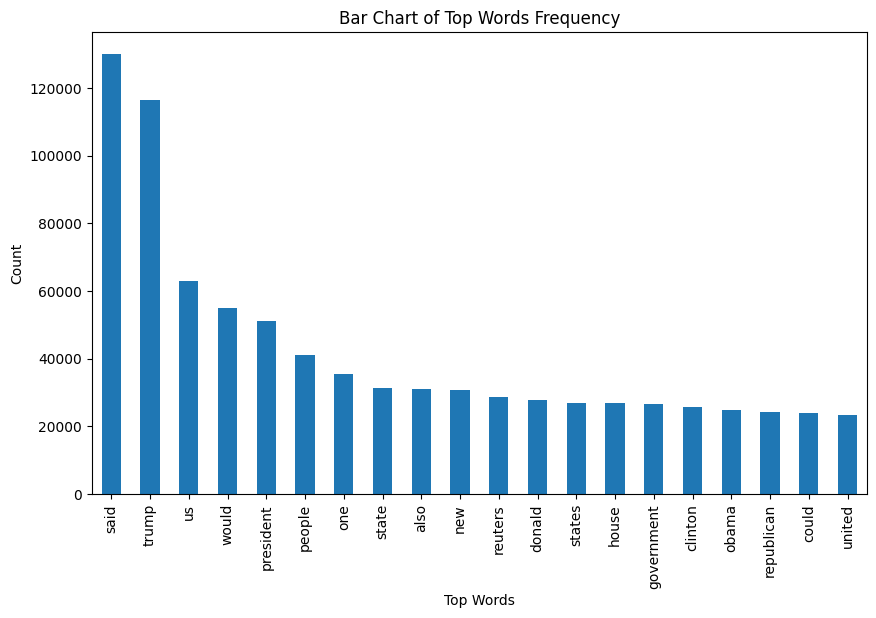

In [35]:
from sklearn.feature_extraction.text import CountVectorizer 

def get_top_n_words(corpus, n=None): 
    vec = CountVectorizer().fit(corpus) 
    bag_of_words = vec.transform(corpus) 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()] 
    words_freq = sorted(words_freq, key=lambda x: x[1], 
                        reverse=True) 
    return words_freq[:n] 
  
common_words = get_top_n_words(data['cleaned_text'], 20) 
df1 = pd.DataFrame(common_words, columns=['Review', 'count']) 
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
    kind='bar', 
    figsize=(10, 6), 
    xlabel="Top Words", 
    ylabel="Count", 
    title="Bar Chart of Top Words Frequency"
) 

In [37]:
x_train, x_test, y_train, y_test = train_test_split(data['cleaned_text'],  
                                                    data['class'],  
                                                    test_size=0.25)

In [38]:
vectorization = TfidfVectorizer() 
x_train = vectorization.fit_transform(x_train) 
x_test = vectorization.transform(x_test)

In [39]:
model = LogisticRegression() 
model.fit(x_train, y_train) 
  
# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 

0.9932025290154056
0.9889581478183437


In [40]:
from sklearn.tree import DecisionTreeClassifier 
  
model = DecisionTreeClassifier() 
model.fit(x_train, y_train) 
  
# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 

0.9999703167205913
0.9964381121994658


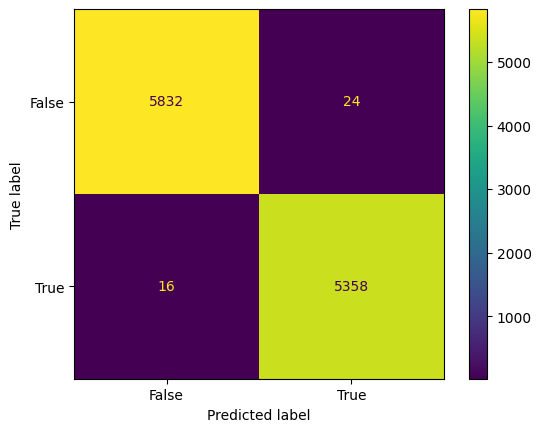

In [41]:
from sklearn import metrics 
cm = metrics.confusion_matrix(y_test, model.predict(x_test)) 
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                            display_labels=[False, True]) 
  
cm_display.plot() 
plt.show() 